<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumApplicationAlgorithms_VQE_PES_PEC_mkbahk_20260125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pyscf numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 MB 9.4 MB/s eta 0:00:00


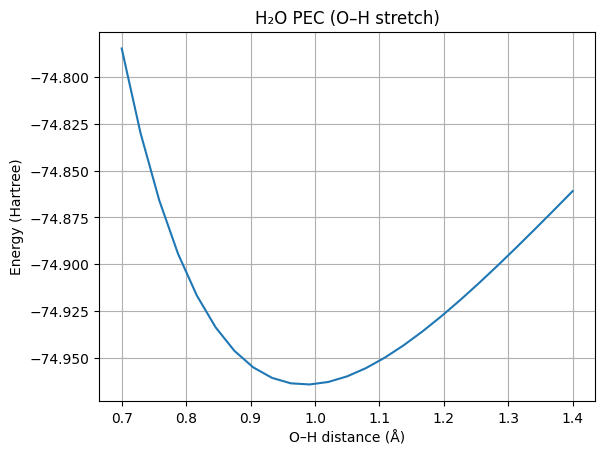

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf

# O-H 거리 스캔 (Angstrom)
oh_distances = np.linspace(0.7, 1.4, 25)

energies = []

for r in oh_distances:
    mol = gto.M(
        atom=f"""
        O  0.000000  0.000000  0.000000
        H  0.000000  0.000000  {r}
        H  {0.96*np.sin(np.deg2rad(104.5)):.6f}  0.000000  {0.96*np.cos(np.deg2rad(104.5)):.6f}
        """,
        basis="sto-3g",
        unit="Angstrom",
        charge=0,
        spin=0,
        verbose=0
    )

    mf = scf.RHF(mol)
    energy = mf.kernel()
    energies.append(energy)

energies = np.array(energies)

plt.figure()
plt.plot(oh_distances, energies)
plt.xlabel("O–H distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("H₂O PEC (O–H stretch)")
plt.grid(True)
plt.show()


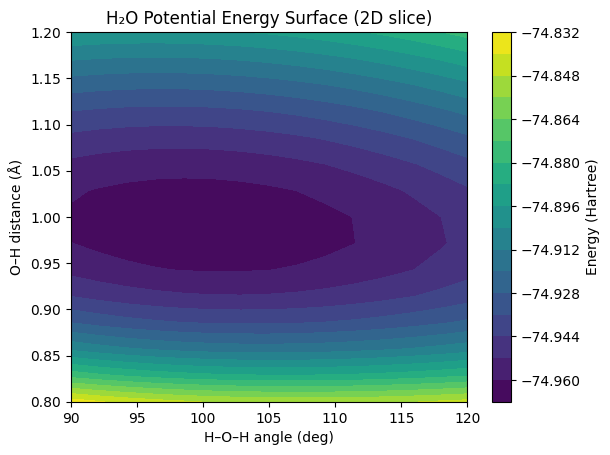

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf

oh_distances = np.linspace(0.8, 1.2, 15)
angles = np.linspace(90, 120, 15)

E = np.zeros((len(oh_distances), len(angles)))

for i, r in enumerate(oh_distances):
    for j, angle in enumerate(angles):
        x = r * np.sin(np.deg2rad(angle))
        z = r * np.cos(np.deg2rad(angle))

        mol = gto.M(
            atom=f"""
            O  0.000000  0.000000  0.000000
            H  0.000000  0.000000  {r}
            H  {x:.6f}  0.000000  {z:.6f}
            """,
            basis="sto-3g",
            unit="Angstrom",
            charge=0,
            spin=0,
            verbose=0
        )

        mf = scf.RHF(mol)
        E[i, j] = mf.kernel()

# Plot PES contour
plt.figure()
X, Y = np.meshgrid(angles, oh_distances)
plt.contourf(X, Y, E, levels=20)
plt.xlabel("H–O–H angle (deg)")
plt.ylabel("O–H distance (Å)")
plt.title("H₂O Potential Energy Surface (2D slice)")
plt.colorbar(label="Energy (Hartree)")
plt.show()
